In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
X_valid, X_train = X_train_full[:5_000] / 255, X_train_full[5_000:] / 255
y_valid, y_train = y_train_full[:5_000], y_train_full[5_000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
model = keras.models.Sequential()

# Preprocess each image by converting it to 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Dense hidden layer with 300 neurons
# Each layer manages its own weight matrix containing all connection weights
# between neurons and their inputs
model.add(keras.layers.Dense(300, activation="relu"))

# Second layer with 100 neurons
model.add(keras.layers.Dense(100, activation="relu"))

# Output layer with 10 neurons (one per class) using softmax activation function (classes are exclusive)
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
# Note that Dense layers often have a lot of parameters. For example, the first hidden
# layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
# 235,500 parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
weights, biases = model.layers[1].get_weights()

# Weights are initialized randomly
weights


array([[ 0.01168192, -0.05692657,  0.03622408, ..., -0.03606072,
        -0.06958124, -0.05201819],
       [-0.00889576, -0.02966519,  0.03795449, ...,  0.06232388,
         0.06698005,  0.06421624],
       [ 0.06525475,  0.02344125, -0.05535536, ..., -0.03722604,
         0.0536218 ,  0.00790839],
       ...,
       [-0.04792947, -0.05591903, -0.01107784, ..., -0.00965104,
         0.06095123, -0.01061905],
       [-0.01057603, -0.02974209,  0.05467021, ...,  0.03052325,
         0.01555669,  0.01353783],
       [-0.07141811, -0.01458085,  0.03386119, ...,  0.05181192,
         0.00810551, -0.04449223]], dtype=float32)

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7163 - accuracy: 0.7667 - val_loss: 0.4985 - val_accuracy: 0.8376

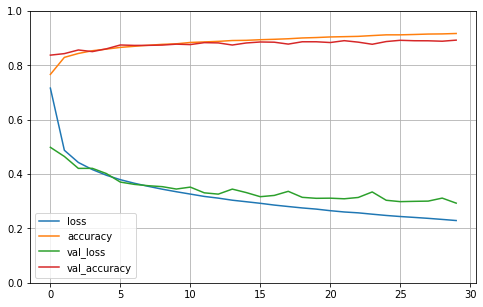

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def print_history(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

print_history(history)


In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2255 - accuracy: 0.9181 - val_loss: 0.2976 - val_accuracy: 0.8962

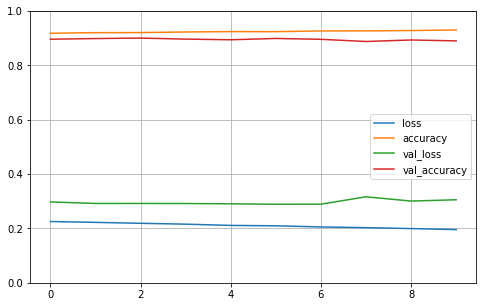

In [11]:
print_history(history)


In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 64.0137 - accuracy: 0.8532


[64.01367950439453, 0.8532000184059143]

Trouser


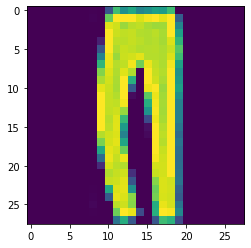

In [13]:
y_pred = model.predict(X_test[:3])

print(class_names[y_pred[2].argmax()])

plt.imshow(X_test[2])